# Trend Fitting Models

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import math


# Load the input files
eastmank_revenue = pd.read_excel("./Data/EASTMANK.XLS", sheet_name = "Data")[["Year", "Real Revenue"]]
eastmank_revenue = eastmank_revenue.rename(columns = {"Real Revenue":"Real_Revenue"})
eastmank_revenue.head()

,Year,Real_Revenue
0,1975,9.3
1,1976,9.5
2,1977,9.9
3,1978,10.7
4,1979,11.0


In [26]:
# Create coded year, quadratic and exponential variables
eastmank_revenue["coded_year"] = eastmank_revenue.index
eastmank_revenue["coded_year_square"] = eastmank_revenue["coded_year"] ** 2
eastmank_revenue["log_Real_Revenue"] = np.log(eastmank_revenue["Real_Revenue"])
eastmank_revenue.head()

,Year,Real_Revenue,coded_year,coded_year_square,log_Real_Revenue
0,1975,9.3,0,0,2.230014
1,1976,9.5,1,1,2.251292
2,1977,9.9,2,4,2.292535
3,1978,10.7,3,9,2.370244
4,1979,11.0,4,16,2.397895


# Linear Trend Fitting Model

In [27]:
from statsmodels.formula.api import ols
linear_trend_model = ols('Real_Revenue ~ coded_year', data = eastmank_revenue).fit()
linear_trend_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Real_Revenue   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.043
Method:                 Least Squares   F-statistic:                  0.003186
Date:                Fri, 06 Nov 2020   Prob (F-statistic):              0.955
Time:                        14:40:37   Log-Likelihood:                -51.942
No. Observations:                  25   AIC:                             107.9
Df Residuals:                      23   BIC:                             110.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.0778      0.782     14.162      0.000       9.460      12.696
coded_year    -0.0032      0.056     -0.056      0.955      -0.119       0.112
==============================================================================
Omnibus:                        3.133   Durbin-Watson:                   0.317
Prob(Omnibus):                  0.209   Jarque-Bera (JB):                2.712
Skew:                           0.760   Prob(JB):                        0.258
Kurtosis:                       2.457   Cond. No.                         27.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

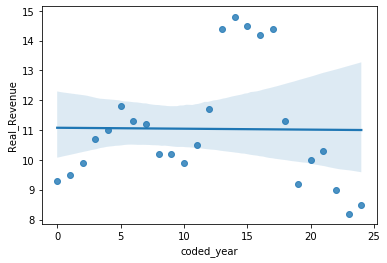

In [28]:
sns.regplot(x = "coded_year", y = "Real_Revenue", data = eastmank_revenue)

# Quadratic Trend fitting Model

In [29]:
quadratic_trend_model = ols('Real_Revenue ~ coded_year + coded_year_square', data = eastmank_revenue).fit()
quadratic_trend_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Real_Revenue   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     8.778
Date:                Fri, 06 Nov 2020   Prob (F-statistic):            0.00158
Time:                        14:40:42   Log-Likelihood:                -44.610
No. Observations:                  25   AIC:                             95.22
Df Residuals:                      22   BIC:                             98.88
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             8.5255      0.853      9.999      0.000       6.757      10.294
coded_year            0.6627      0.165      4.027      0.001       0.321       1.004
coded_year_square    -0.0277      0.007     -4.189      0.000      -0.041      -0.014
==============================================================================
Omnibus:                        0.779   Durbin-Watson:                   0.523
Prob(Omnibus):                  0.677   Jarque-Bera (JB):                0.780
Skew:                           0.219   Prob(JB):                        0.677
Kurtosis:                       2.254   Cond. No.                         748.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

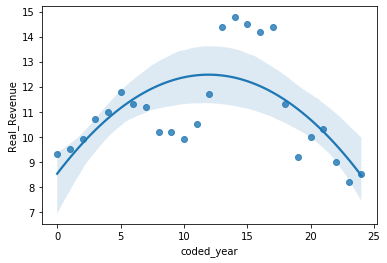

In [30]:
sns.regplot(x = "coded_year", y = "Real_Revenue", data = eastmank_revenue, order = 2)

# Exponential Trend fitting Model

In [31]:
exponential_trend_model = ols('log_Real_Revenue ~ coded_year', data = eastmank_revenue).fit()
exponential_trend_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       log_Real_Revenue   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.040
Method:                 Least Squares   F-statistic:                   0.07635
Date:                Fri, 06 Nov 2020   Prob (F-statistic):              0.785
Time:                        14:42:10   Log-Likelihood:                 9.1417
No. Observations:                  25   AIC:                            -14.28
Df Residuals:                      23   BIC:                            -11.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4031      0.068     35.364      0.000       2.263       2.544
coded_year    -0.0013      0.005     -0.276      0.785      -0.011       0.009
==============================================================================
Omnibus:                        2.133   Durbin-Watson:                   0.316
Prob(Omnibus):                  0.344   Jarque-Bera (JB):                1.854
Skew:                           0.578   Prob(JB):                        0.396
Kurtosis:                       2.334   Cond. No.                         27.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

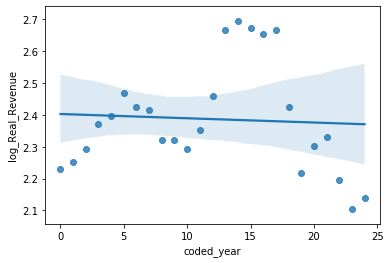

In [32]:
sns.regplot(x = "coded_year", y = "log_Real_Revenue", data = eastmank_revenue)